In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import PLACES data
places_df = pd.read_csv("./Resources/processed_PLACES_COPD.csv")
places_df = places_df.drop(["State_County"], axis=1)
places_df.head()

,State,County,Levels_Smokers,Levels_COPD
0,Iowa,Cass,19.3,8.3
1,Iowa,Monona,18.5,8.3
2,Alaska,Dillingham,31.1,8.9
3,Colorado,Custer,13.8,7.5
4,Alaska,Ketchikan Gateway,19.4,6.6


In [3]:
# Import Coal Mines data
coal_df = pd.read_csv("./Resources/processed_Coal_Mines.csv")
coal_df = coal_df.drop(["State_County"], axis=1)
coal_df.head()

,State,County,Surface_Mines,Underground_Mines
0,Alabama,Walker,22,2.0
1,Alabama,Jefferson,22,5.0
2,Alabama,Jefferson,13,5.0
3,Alabama,Tuscaloosa,13,12.0
4,Alabama,Jefferson,13,14.0


In [4]:
# Import Air Quality data
aqi_df = pd.read_csv("./Resources/processed_Decade_Air_Quality.csv")
aqi_df = aqi_df.drop(["State_County"], axis=1)
aqi_df.head()

,State,County,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,Alabama,Baldwin,523.0,455.0,66.0,2.0,0.0,0.0,0.0
1,Alabama,Clay,226.0,194.0,32.0,0.0,0.0,0.0,0.0
2,Alabama,Colbert,586.0,472.0,114.0,0.0,0.0,0.0,0.0
3,Alabama,DeKalb,724.0,635.0,89.0,0.0,0.0,0.0,0.0
4,Alabama,Elmore,472.0,436.0,36.0,0.0,0.0,0.0,0.0


In [5]:
# Import Census 2019 data
census_df = pd.read_csv("./Resources/processed_census_data.csv")
census_df = census_df.drop(["State_County"], axis=1)
census_df.head()

,State,County,PERC_TOT_MALE_0,PERC_TOT_FEMALE_0,PERC_WA_MALE_0,PERC_WA_FEMALE_0,PERC_BA_MALE_0,PERC_BA_FEMALE_0,PERC_IA_MALE_0,PERC_IA_FEMALE_0,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,Alabama,Autauga,48.492008,51.507992,37.369561,38.892767,9.373714,10.739408,0.216578,0.259536,...,0.747863,1.282051,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,Alabama,Baldwin,48.490373,51.509627,42.471129,44.969852,4.249353,4.527536,0.404508,0.375839,...,0.427350,0.899685,0.0,0.000000,0.0,0.022492,0.0,0.0,0.000000,0.0
2,Alabama,Barbour,52.920684,47.079316,25.881066,23.272300,25.565098,22.664668,0.417241,0.271409,...,0.639659,0.426439,0.0,0.213220,0.0,0.213220,0.0,0.0,0.000000,0.0
3,Alabama,Bibb,53.268733,46.731267,39.144414,37.621684,13.132982,8.136108,0.236671,0.223274,...,1.028278,0.000000,0.0,0.514139,0.0,0.000000,0.0,0.0,0.000000,0.0
4,Alabama,Blount,49.237367,50.762633,47.137966,48.687442,0.892332,0.798949,0.332031,0.307820,...,1.818182,0.545455,0.0,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.0


In [6]:
# Merge places and coal dataframes
merged_df = pd.merge(places_df, coal_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines
0,Iowa,Cass,19.3,8.3,NaN,NaN
1,Iowa,Monona,18.5,8.3,NaN,NaN
2,Alaska,Dillingham,31.1,8.9,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN
...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN
3178,West Virginia,Webster,26.8,15.3,NaN,NaN
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN


In [7]:
# Merge in the Air Quality data
merged_df = pd.merge(merged_df, aqi_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,Iowa,Cass,19.3,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iowa,Monona,18.5,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,Dillingham,31.1,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN,678.0,571.0,103.0,4.0,0.0,0.0,0.0
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN,722.0,546.0,168.0,8.0,0.0,0.0,0.0
3178,West Virginia,Webster,26.8,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Merge in the census data
merged_df = pd.merge(merged_df, census_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,Iowa,Cass,19.3,8.3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.215517,0.646552,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,Iowa,Monona,18.5,8.3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.744417,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,Alaska,Dillingham,31.1,8.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.222222,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN,678.0,571.0,103.0,4.0,...,0.000000,0.064020,0.0,0.192061,0.000000,0.000000,0.0,0.0,0.0,0.0
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN,722.0,546.0,168.0,8.0,...,0.703060,0.516956,0.0,0.000000,0.020678,0.062035,0.0,0.0,0.0,0.0
3178,West Virginia,Webster,26.8,15.3,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.961538,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,...,0.276035,0.702635,0.0,0.000000,0.025094,0.000000,0.0,0.0,0.0,0.0


In [9]:
# View null values
merged_df.isnull().sum()

State                     0
County                    1
Levels_Smokers            0
Levels_COPD               0
Surface_Mines          3078
                       ... 
PERC_HIAC_FEMALE_18     296
PERC_HAAC_MALE_18       296
PERC_HAAC_FEMALE_18     296
PERC_HNAC_MALE_18       296
PERC_HNAC_FEMALE_18     296
Length: 1381, dtype: int64

In [10]:
# View the county with a NaN value
merged_df[merged_df['County'].isnull()]

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
33,United States,NaN,15.3,6.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop the row containing "United States"
merged_df = merged_df[merged_df.State != "United States"]
merged_df.isnull().sum()

State                     0
County                    0
Levels_Smokers            0
Levels_COPD               0
Surface_Mines          3077
                       ... 
PERC_HIAC_FEMALE_18     295
PERC_HAAC_MALE_18       295
PERC_HAAC_FEMALE_18     295
PERC_HNAC_MALE_18       295
PERC_HNAC_FEMALE_18     295
Length: 1381, dtype: int64

In [12]:
# Fill Nulls from states without mines to be 0
merged_df = merged_df.fillna(0)
merged_df.isnull().sum()

State                  0
County                 0
Levels_Smokers         0
Levels_COPD            0
Surface_Mines          0
                      ..
PERC_HIAC_FEMALE_18    0
PERC_HAAC_MALE_18      0
PERC_HAAC_FEMALE_18    0
PERC_HNAC_MALE_18      0
PERC_HNAC_FEMALE_18    0
Length: 1381, dtype: int64

In [13]:
# Drop County name as it might confuse the model
dataset = merged_df.drop(["County"], axis=1)

,State,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,Iowa,19.3,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215517,0.646552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Iowa,18.5,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.744417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alaska,31.1,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Colorado,13.8,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Alaska,19.4,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Alabama,15.7,6.7,0.0,0.0,710.0,527.0,182.0,1.0,0.0,...,0.466490,0.637537,0.031099,0.046649,0.000000,0.015550,0.000000,0.015550,0.000000,0.015550
115,California,14.4,6.2,0.0,0.0,730.0,439.0,277.0,14.0,0.0,...,4.610103,6.571849,0.049044,0.147131,0.147131,0.833742,0.098087,0.098087,0.049044,0.098087
116,Colorado,13.1,4.5,4.0,1.0,722.0,563.0,156.0,3.0,0.0,...,0.000000,3.468208,0.000000,0.000000,0.578035,0.000000,0.000000,0.000000,0.000000,0.000000
117,Arizona,15.5,9.3,0.0,0.0,621.0,524.0,97.0,0.0,0.0,...,1.828057,1.920784,0.000000,0.026494,0.026494,0.132468,0.013247,0.066234,0.000000,0.026494


In [14]:
# dataset['Total_Population']= dataset['Total_Population'].astype(float)

In [15]:
le = LabelEncoder()
df2 = dataset.copy()

In [16]:
# Generate our categorical variable lists
dataset_cat = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
dataset_cat

['State']

In [17]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    df2[textColumn] = le.fit_transform(df2[textColumn])

In [18]:
# Display dataframe
df2

,State,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,15,19.3,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215517,0.646552,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,15,18.5,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.744417,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,1,31.1,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,5,13.8,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.222222,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,1,19.4,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,48,16.8,6.5,0.0,0.0,678.0,571.0,103.0,4.0,0.0,...,0.000000,0.064020,0.0,0.192061,0.000000,0.000000,0.0,0.0,0.0,0.0
3177,48,15.1,5.5,0.0,0.0,722.0,546.0,168.0,8.0,0.0,...,0.703060,0.516956,0.0,0.000000,0.020678,0.062035,0.0,0.0,0.0,0.0
3178,47,26.8,15.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.961538,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3179,48,17.1,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276035,0.702635,0.0,0.000000,0.025094,0.000000,0.0,0.0,0.0,0.0


In [19]:
#X = dataset.drop(['Levels_COPD'], axis = 1).values
#y = dataset['Levels_COPD']

In [20]:
# Create our features
a_cols = [i for i in df2.columns if i not in ('Levels_COPD')]
X = df2[a_cols]

# Create our target
y = df2['Levels_COPD']

In [21]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [22]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(dataset[dataset_cat]))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(dataset_cat)

# Set options to show all columns
# pd.options.display.max_columns = 50

# View the dataframe
# encode_df.head()

In [23]:
# Step 4: Training the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [24]:
regressor.feature_importances_

array([9.59377539e-03, 7.40142088e-01, 4.93112855e-06, ...,
       2.27989638e-07, 6.31834744e-08, 1.51123842e-07])

In [25]:
importances = regressor.feature_importances_

In [26]:
features = sorted(zip(X.columns, regressor.feature_importances_), key = lambda x: x[1], reverse=True)

In [27]:
feat_x, feat_y = zip(*features)
feat_x

('Levels_Smokers',
 'PERC_NHWAC_FEMALE_12',
 'State',
 'PERC_NHWA_FEMALE_12',
 'PERC_NH_FEMALE_0',
 'PERC_TOT_FEMALE_12',
 'PERC_WAC_FEMALE_12',
 'PERC_TOT_MALE_16',
 'PERC_TOT_FEMALE_0',
 'PERC_NHWA_MALE_5',
 'PERC_NH_MALE_16',
 'PERC_NHWA_FEMALE_2',
 'PERC_NHWA_FEMALE_1',
 'PERC_NH_FEMALE_6',
 'PERC_NH_MALE_18',
 'PERC_NH_MALE_17',
 'PERC_AA_FEMALE_5',
 'PERC_NHWAC_FEMALE_13',
 'PERC_NHWA_FEMALE_3',
 'PERC_NHWA_FEMALE_7',
 'PERC_TOT_MALE_17',
 'PERC_H_FEMALE_1',
 'Moderate_Days',
 'PERC_NHAAC_FEMALE_12',
 'PERC_HIA_MALE_6',
 'PERC_WA_MALE_16',
 'PERC_NH_FEMALE_10',
 'PERC_NHWAC_MALE_17',
 'PERC_TOT_FEMALE_8',
 'PERC_WAC_FEMALE_14',
 'PERC_WA_MALE_18',
 'PERC_TOM_FEMALE_15',
 'Good_Days',
 'PERC_NHWAC_MALE_16',
 'PERC_NHWAC_FEMALE_0',
 'PERC_NH_FEMALE_14',
 'PERC_NHWAC_FEMALE_10',
 'PERC_NH_FEMALE_17',
 'PERC_WA_FEMALE_12',
 'PERC_TOT_MALE_12',
 'PERC_HAA_MALE_1',
 'Days_with_AQI',
 'PERC_AAC_MALE_6',
 'PERC_WAC_MALE_18',
 'PERC_AA_FEMALE_15',
 'PERC_HBA_MALE_7',
 'PERC_NH_FEMALE_12',

In [28]:
top_10_features = features[0:10]
top_10_features

[('Levels_Smokers', 0.7401420875698395),
 ('PERC_NHWAC_FEMALE_12', 0.010159568241414127),
 ('State', 0.00959377539381118),
 ('PERC_NHWA_FEMALE_12', 0.008375407945729411),
 ('PERC_NH_FEMALE_0', 0.005812341258251826),
 ('PERC_TOT_FEMALE_12', 0.004501300383556088),
 ('PERC_WAC_FEMALE_12', 0.004223198427911968),
 ('PERC_TOT_MALE_16', 0.0034914973635107576),
 ('PERC_TOT_FEMALE_0', 0.0030554488295769),
 ('PERC_NHWA_MALE_5', 0.002831949644959772)]

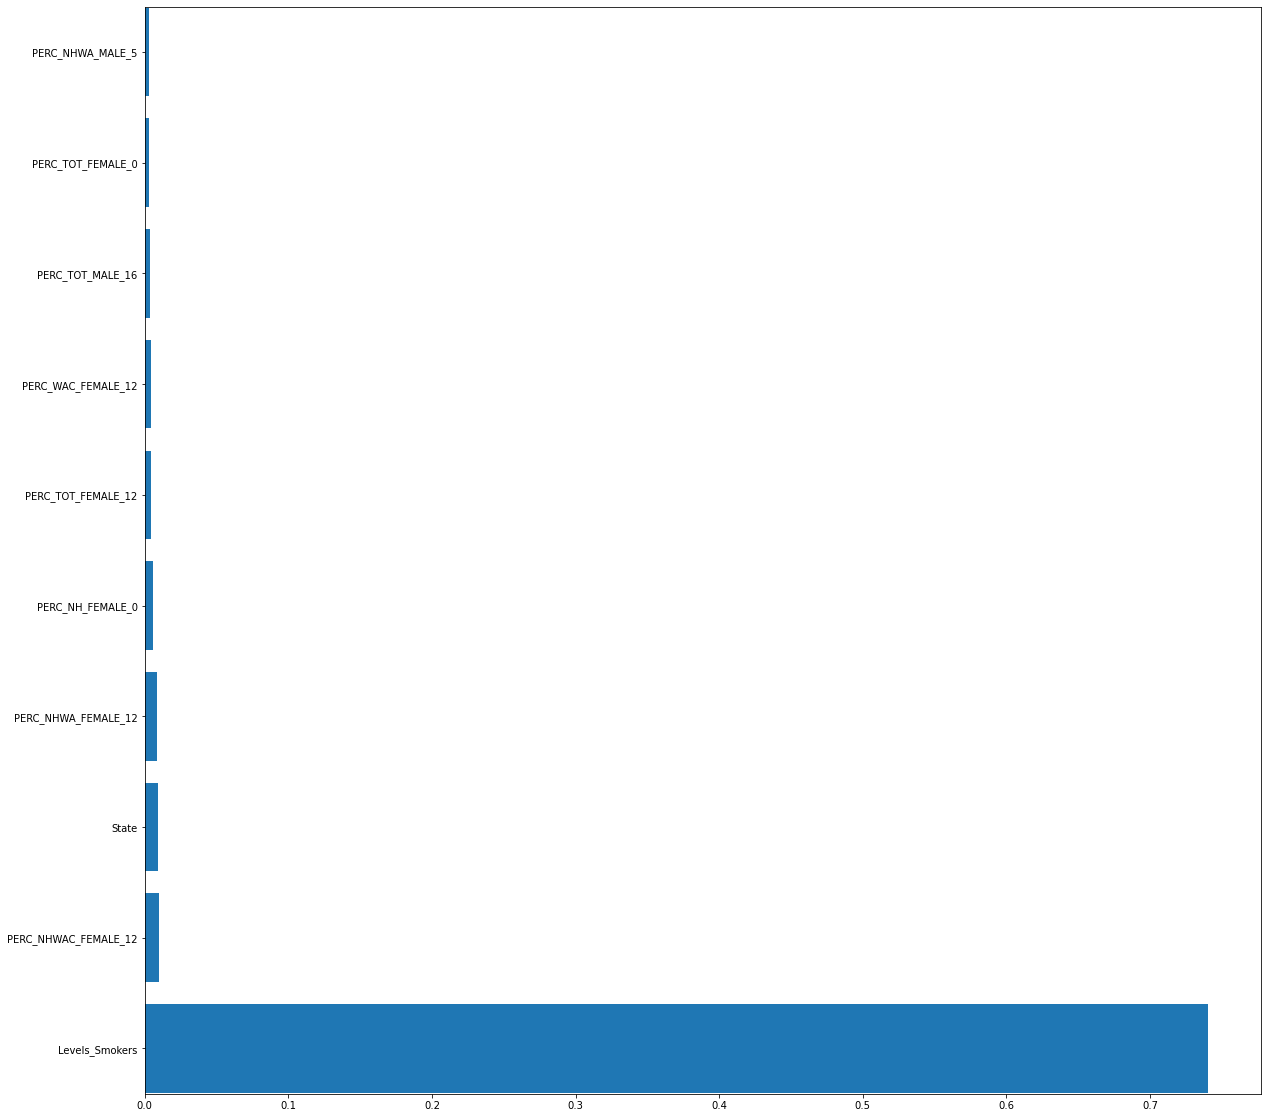

In [29]:
# cols = [f[0] for f in features]
cols = [f[0] for f in top_10_features]
# width = [f[1] for f in features]
width = [f[1] for f in top_10_features]
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)
plt.show()

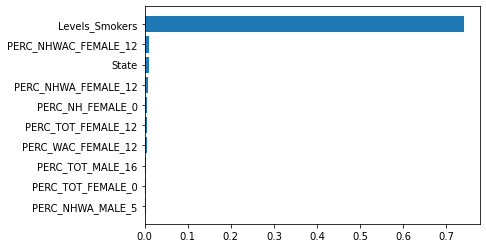

In [30]:
# cols = [f[0] for f in features]
cols = [f[0] for f in top_10_features]
# width = [f[1] for f in features]
width = [f[1] for f in top_10_features]

plt.figure()
plt.barh(cols, width)
plt.gca().invert_yaxis()

In [31]:
# Step 5: Predicting the Results

y_pred = regressor.predict(X_test)

In [32]:
# Step 6: Evaluating the Algorithm
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.003460975461627


In [33]:
# Step 6: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
1095,14.0,14.00
642,6.9,8.92
1573,7.3,7.70
576,6.8,7.77
118,4.9,5.17
...,...,...
1613,14.1,12.74
3030,8.9,7.70
1377,7.6,7.98
2763,8.1,8.20


In [36]:
# Export results from y test to csv
file_path = "../Data_Processing/Resources/RandomForest_Pred_vs_Actual_y_Results.csv"
df.to_csv(file_path)

In [41]:
X_test.head(118)

,State,Levels_Smokers,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
1095,17,28.9,1.0,0.0,710.0,614.0,96.0,0.0,0.0,0.0,...,0.508906,0.254453,0.254453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
642,15,20.2,0.0,0.0,371.0,321.0,49.0,1.0,0.0,0.0,...,1.019935,1.437181,0.000000,0.046361,0.046361,0.139082,0.046361,0.046361,0.000000,0.000000
1573,27,16.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,6.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
576,12,16.8,0.0,0.0,614.0,552.0,62.0,0.0,0.0,0.0,...,0.633513,1.045296,0.031676,0.031676,0.031676,0.095027,0.000000,0.000000,0.000000,0.000000
118,4,13.3,0.0,0.0,730.0,122.0,335.0,137.0,120.0,16.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,17,25.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.735294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2484,42,18.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.079646,10.324484,0.294985,0.589971,0.294985,0.589971,0.000000,0.000000,0.000000,0.000000
2577,42,18.0,0.0,0.0,730.0,580.0,148.0,2.0,0.0,0.0,...,2.086231,2.642559,0.069541,0.208623,0.069541,0.069541,0.069541,0.000000,0.069541,0.069541
2048,32,22.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.460405,0.598527,0.000000,0.092081,0.046041,0.092081,0.000000,0.000000,0.000000,0.046041


In [43]:
dataset.head(331)

,State,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,Iowa,19.3,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215517,0.646552,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,Iowa,18.5,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.744417,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,Alaska,31.1,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,Colorado,13.8,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.222222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,Alaska,19.4,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Florida,17.8,7.7,0.0,0.0,725.0,670.0,54.0,1.0,0.0,...,1.009825,2.483624,0.054585,0.218341,0.027293,0.0,0.027293,0.054585,0.0,0.027293
328,Georgia,21.8,11.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
329,Georgia,24.1,10.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.020202,2.020202,0.505051,0.000000,0.505051,0.0,0.000000,0.000000,0.0,0.000000
330,Georgia,24.1,10.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.190476,0.000000,0.714286,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [ ]:
# Export values from x test to csv
file_path = "../Data_Processing/Resources/RandomForest_Pred_vs_Actual_X_Results.csv"
X_test.to_csv(file_path)

In [ ]:
plt.title('Scatter Plots')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.scatter(X, y)
plt.show()

In [ ]:
X.info()

In [ ]:
np.arange(X)

In [ ]:
# # Visualising the Random Forest Regression Results  
# 
X_grid = np.arange(int (float(min(X))), int(float(max(X))), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.show()

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")